In [1018]:
%matplotlib inline
%pylab inline

import pandas as pd
import numpy as np
train_set =pd.read_csv('train_set.csv')
test_set =pd.read_csv('test_set.csv')
train_set.head(10)

Populating the interactive namespace from numpy and matplotlib


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [1019]:
print(train_set.shape, test_set.shape)

(8523, 12) (5681, 11)


In [1020]:
test_set['Item_Outlet_Sales']=np.nan

In [1022]:
combine = train_set.append(test_set)

In [1023]:
combine.shape

(14204, 12)

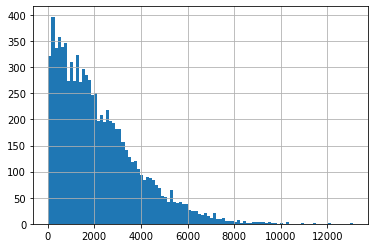

In [1025]:
train_set['Item_Outlet_Sales'].hist(bins=100)

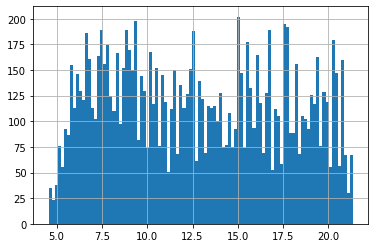

In [1026]:
combine['Item_Weight'].hist(bins=100)

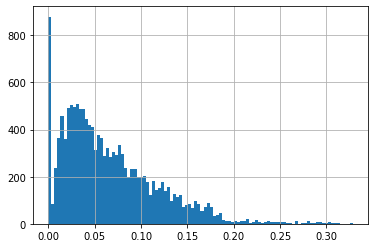

In [1027]:
combine['Item_Visibility'].hist(bins=100)

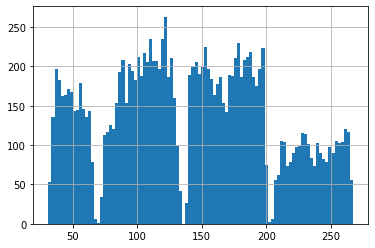

In [1028]:
combine['Item_MRP'].hist(bins=100)

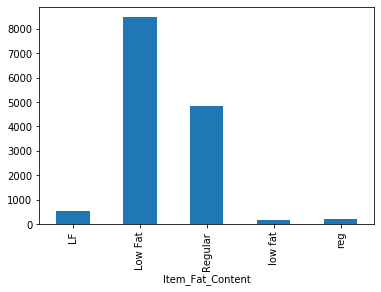

In [1030]:
combine.groupby('Item_Fat_Content').count()['Item_Identifier'].plot.bar()

In [1031]:
combine['Item_Fat_Content'] = combine['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

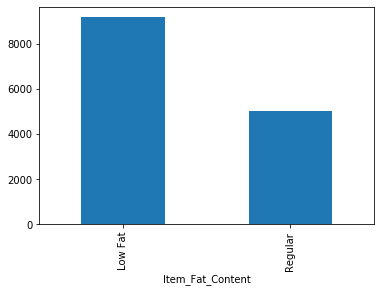

In [1032]:
combine.groupby('Item_Fat_Content').count()['Item_Identifier'].plot.bar()

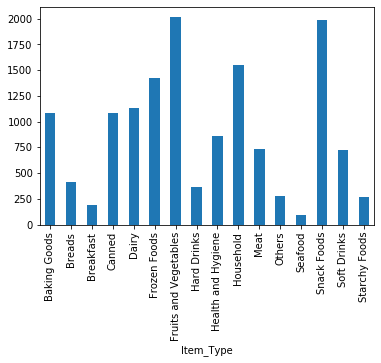

In [1033]:
combine.groupby('Item_Type').count()['Item_Identifier'].plot.bar()

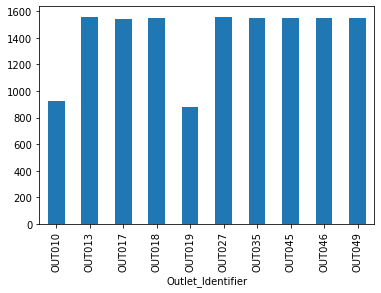

In [1035]:
combine.groupby('Outlet_Identifier').count()['Item_Identifier'].plot.bar()

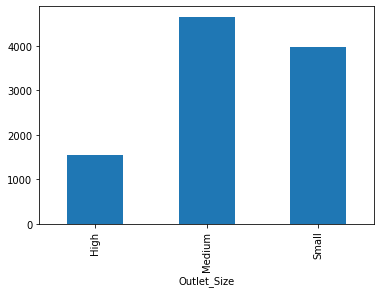

In [1036]:
combine.groupby('Outlet_Size').count()['Item_Identifier'].plot.bar()

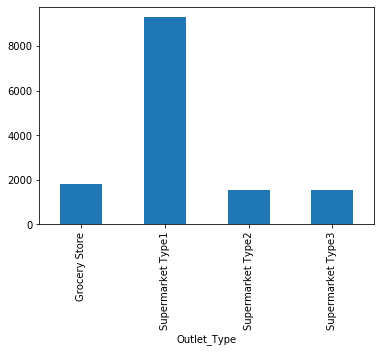

In [1037]:
combine.groupby('Outlet_Type').count()['Item_Identifier'].plot.bar()

In [1041]:
df_train, df_test = combine.iloc[0:train_set.shape[0], :], combine.iloc[train_set.shape[0]:, :]

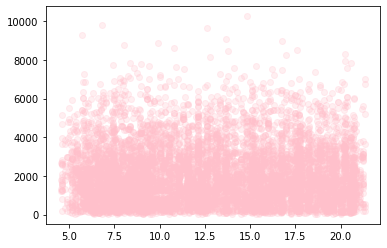

In [1042]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(df_train.Item_Weight, df_train.Item_Outlet_Sales, alpha=0.25, c='pink')

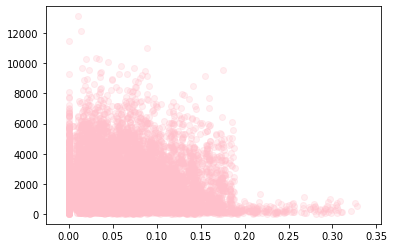

In [1043]:
plt.scatter(df_train.Item_Visibility, df_train.Item_Outlet_Sales, alpha=0.25, c='pink')

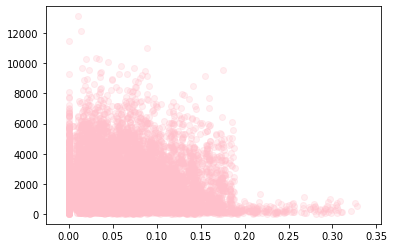

In [1044]:
plt.scatter(df_train.Item_Visibility, df_train.Item_Outlet_Sales, alpha=0.25, c='pink')

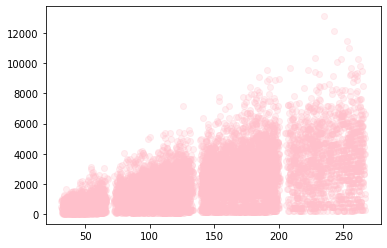

In [1045]:
plt.scatter(df_train.Item_MRP, df_train.Item_Outlet_Sales, alpha=0.25, c='pink')

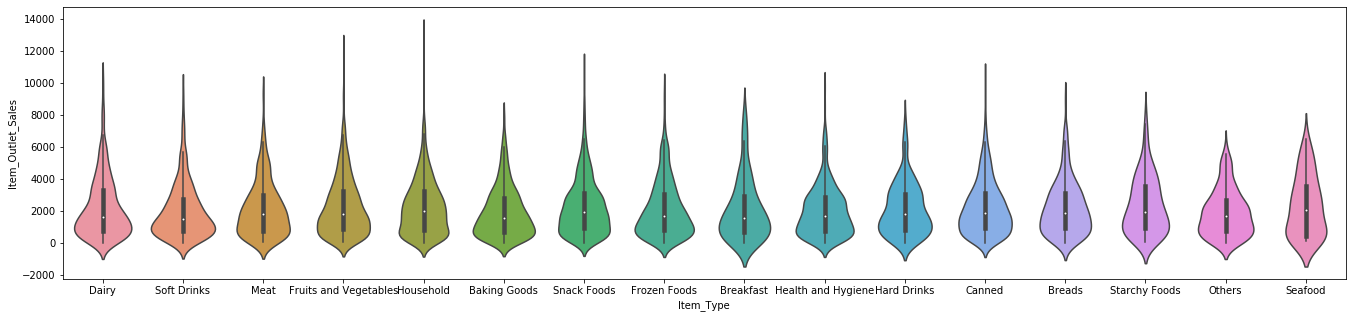

In [1046]:
import seaborn as sns

fig, ax = pyplot.subplots(figsize =(23, 5)) 
sns.violinplot( ax = ax, x = df_train["Item_Type"],  
                  y = df_train["Item_Outlet_Sales"] )

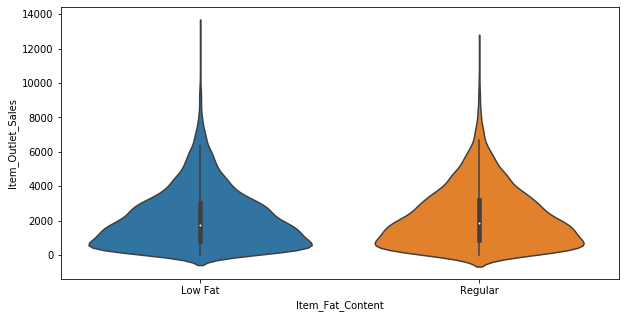

In [1047]:
fig, ax = pyplot.subplots(figsize =(10, 5)) 
sns.violinplot( ax = ax, x = df_train["Item_Fat_Content"],  
                  y = df_train["Item_Outlet_Sales"] )

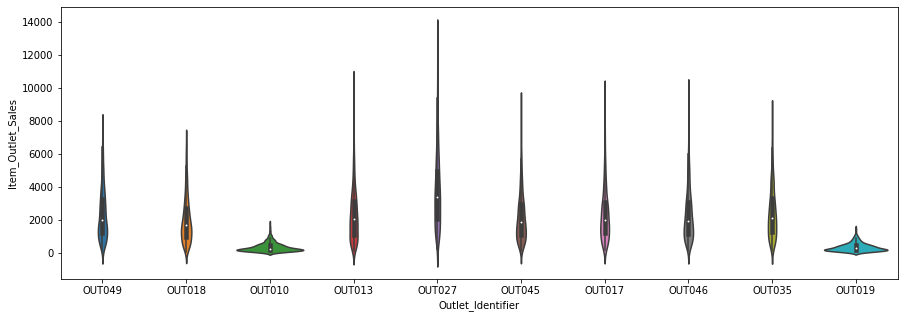

In [1048]:
fig, ax = pyplot.subplots(figsize =(15, 5)) 
sns.violinplot( ax = ax, x = df_train["Outlet_Identifier"],  
                  y = df_train["Item_Outlet_Sales"] )

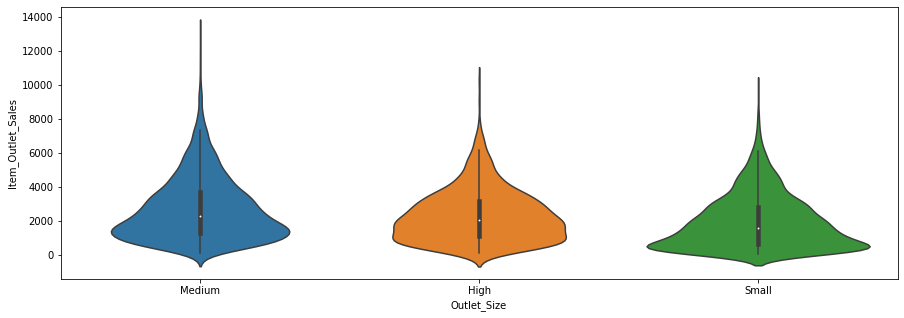

In [1049]:
fig, ax = pyplot.subplots(figsize =(15, 5)) 
sns.violinplot( ax = ax, x = combine["Outlet_Size"],  
                  y = combine["Item_Outlet_Sales"] )

In [1050]:
df_train["Outlet_Size"].isnull().sum()

2410

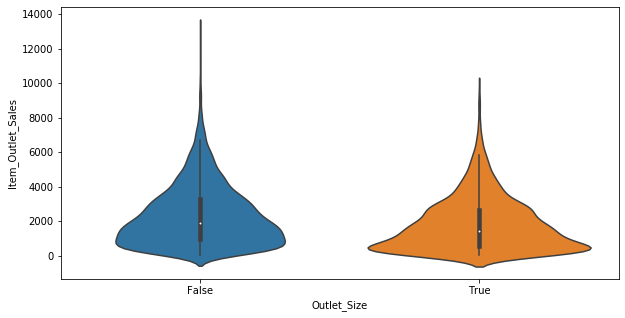

In [1051]:
fig, ax = pyplot.subplots(figsize =(10, 5)) 
sns.violinplot( ax = ax, x = combine["Outlet_Size"].isnull(),  
                  y = combine["Item_Outlet_Sales"] )

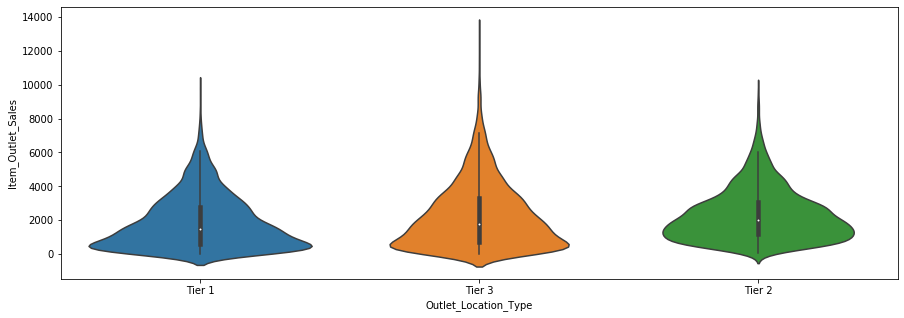

In [1052]:
fig, ax = pyplot.subplots(figsize =(15, 5)) 
sns.violinplot( ax = ax, x = combine["Outlet_Location_Type"],  
                  y = combine["Item_Outlet_Sales"] )

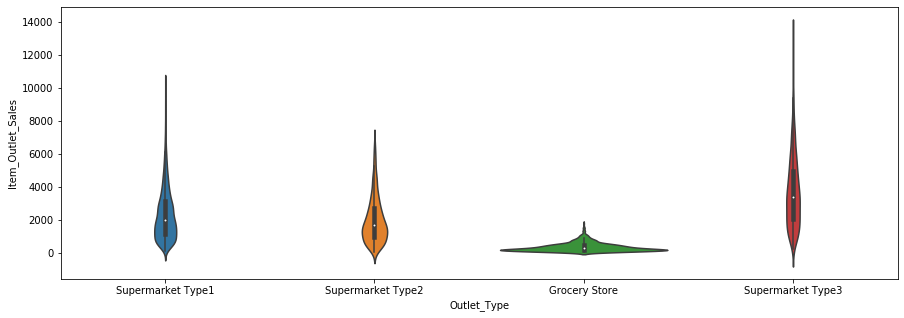

In [1053]:
fig, ax = pyplot.subplots(figsize =(15, 5)) 
sns.violinplot( ax = ax, x = combine["Outlet_Type"],  
                  y = combine["Item_Outlet_Sales"] )

In [1054]:
combine.Item_Weight.isnull().sum()

2439

In [1055]:
combine.Item_Weight.fillna(combine.groupby('Item_Identifier').Item_Weight.transform('mean'), inplace=True)

In [1056]:
combine.Item_Weight.isnull().sum()

0

In [1057]:
combine[combine.Item_Visibility == 0].shape[0]

879

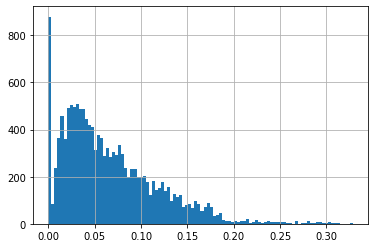

In [1058]:
combine['Item_Visibility'].hist(bins=100)

In [1059]:
col = combine.groupby('Item_Identifier').Item_Visibility.transform('mean')
combine.Item_Visibility[combine.Item_Visibility == 0] = col[combine.Item_Visibility == 0]

/Users/khanhhuyen4523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1060]:
combine.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1061]:
combine.shape

(14204, 12)

In [1062]:
combine.Item_Visibility.isnull().sum()

0

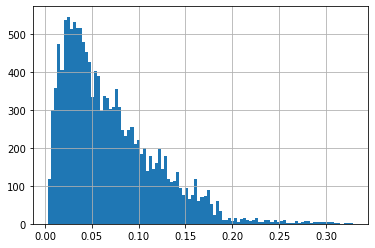

In [1063]:
combine['Item_Visibility'].hist(bins=100)

In [1064]:
# Feature engineering
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood", "perishable"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks", "non_perishable"]

#combine['Item_Type_New'] = combine['Item_Type']

def map_item_type(x):
    if x in perishable:
        return 'perishable'
    if x in non_perishable:
        return 'non_perishable'
    return 'not_sure'

combine.Item_Type_New = combine.Item_Type.apply(map_item_type)

/Users/khanhhuyen4523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [1065]:
combine.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1066]:
combine.shape

(14204, 12)

In [1067]:
combine['Item_Category'] = combine.Item_Identifier.str[:2]

In [1068]:
combine.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [1069]:
combine.Item_Fat_Content.isnull().sum()

0

In [1070]:
combine['Outlet_Years'] = 2013 - combine.Outlet_Establishment_Year 

In [1071]:
combine.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14


In [1072]:
combine['price_per_unit_wt'] = combine.Item_MRP/combine.Item_Weight

In [1073]:
combine['price_per_unit_wt'].head(3)

0    26.861204
1     8.153581
2     8.092457
Name: price_per_unit_wt, dtype: float64

In [1075]:
# combine['Item_MRP_clusters'] = combine['Item_MRP']
combine.Item_MRP = pd.to_numeric(combine.Item_MRP, errors='coerce')

def map_item_MRP(x):
    if x < 69:
        return '1st'
    if x >= 69 and x < 136:
        return '2nd'
    if x >= 136 and x < 203:
        return '3rd'
    return '4th'

combine.Item_MRP_clusters = combine.Item_MRP.apply(map_item_MRP)
        

/Users/khanhhuyen4523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


In [1076]:
combine.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years,price_per_unit_wt
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457
3,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15,9.484115
4,NCD19,8.930,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512
5,FDP36,10.395,Regular,0.057059,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,4.944762


In [1077]:
combine.shape

(14204, 15)

In [1078]:
combine['Outlet_Size_num'] = combine['Outlet_Size']
combine.Outlet_Size_num.fillna(0, inplace=True)
for i, v in enumerate(['Small', 'Medium', 'High']):
    combine.Outlet_Size_num.replace(v, i, inplace=True)

In [1079]:
combine.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years,price_per_unit_wt,Outlet_Size_num
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,1
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15,9.484115,0
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,2


In [1080]:
combine['Outlet_Location_Type_num'] = combine['Outlet_Location_Type']
for i, v in enumerate(['Tier 3', 'Tier 2', 'Tier 1']):
    combine.Outlet_Location_Type_num.replace(v, i, inplace=True)

In [1081]:
del combine['Outlet_Size']
del combine['Outlet_Location_Type']

In [1082]:
# Get one hot encoding of columns B
sub_combine = combine.drop(['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1)
one_hot = pd.get_dummies(sub_combine)
# Drop column B as it is now encoded
combine = combine.drop(sub_combine,axis = 1)
# Join the encoded df
combine = pd.concat([combine.reset_index(drop=True), one_hot.reset_index(drop=True)], axis=1)


In [1083]:
combine.shape

(14204, 30)

In [1084]:
combine.head(5)

,Item_Identifier,Item_Type,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,price_per_unit_wt,Outlet_Size_num,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,FDA15,Dairy,1999,9.30,0.016047,249.8092,3735.1380,14,26.861204,1,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,Soft Drinks,2009,5.92,0.019278,48.2692,443.4228,4,8.153581,1,...,0,0,0,0,0,1,0,1,0,0
2,FDN15,Meat,1999,17.50,0.016760,141.6180,2097.2700,14,8.092457,1,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,Fruits and Vegetables,1998,19.20,0.017834,182.0950,732.3800,15,9.484115,0,...,0,0,0,1,0,0,0,0,1,0
4,NCD19,Household,1987,8.93,0.009780,53.8614,994.7052,26,6.031512,2,...,0,0,0,0,1,0,0,0,0,1


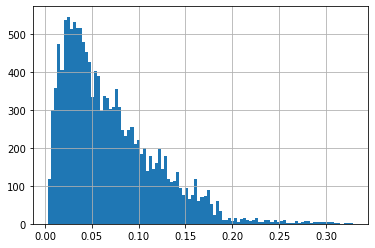

In [1085]:
combine.Item_Visibility.hist(bins=100)

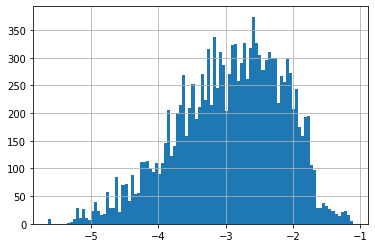

In [1086]:
Item_Visibility_log = np.log(combine.Item_Visibility)
Item_Visibility_log.hist(bins=100)

Feature "Item_Visibility" has value (x) > 0 and < 1 (we handled all 0 values in previous steps). Therefore, it would be better to use log(x + 1) to remove the skewness of the data (values of "Item_Visibility" will be negative if using only log(x) as shown in the plot above).

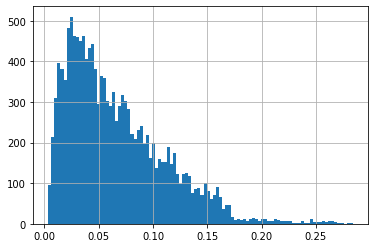

In [1087]:
# prefer using log(x+c)
combine['Item_Visibility_log'] = np.log(combine.Item_Visibility + 1)
combine.Item_Visibility_log.hist(bins=100)

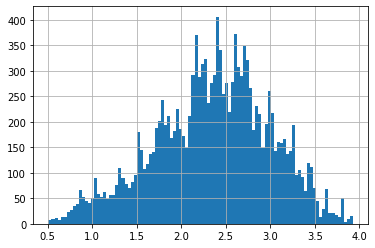

In [1088]:
combine['price_per_unit_wt_log'] = np.log(combine.price_per_unit_wt)
combine.price_per_unit_wt_log.hist(bins=100)

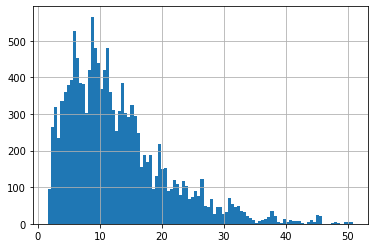

In [1089]:
combine.price_per_unit_wt.hist(bins=100)

In [1090]:
num_var.head(3)

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,price_per_unit_wt,Outlet_Size_num,Outlet_Location_Type_num,Item_Fat_Content_Low Fat,...,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_log,price_per_unit_wt_log
0,1999,9.30,0.016047,249.8092,3735.138,14,26.861204,1,2,1,...,1,0,1,0,0,0,1,0,0.015920,3.290683
0,1999,20.75,0.007565,107.8622,NaN,14,5.198178,1,2,1,...,1,0,1,0,0,0,1,0,0.007536,1.648308
0,1999,9.30,0.016047,249.8092,3735.138,14,26.861204,1,2,1,...,1,0,1,0,0,0,1,0,0.015920,3.290683


In [1091]:
num_var = combine.select_dtypes(include=[np.number])

In [1092]:
combi_numeric_norm = num_var.loc[:, num_var.columns != 'Item_Outlet_Sales']

In [1093]:
combi_numeric_norm.head(3)

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,price_per_unit_wt,Outlet_Size_num,Outlet_Location_Type_num,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_log,price_per_unit_wt_log
0,1999,9.30,0.016047,249.8092,14,26.861204,1,2,1,0,...,1,0,1,0,0,0,1,0,0.015920,3.290683
1,2009,5.92,0.019278,48.2692,4,8.153581,1,0,0,1,...,0,0,0,1,0,1,0,0,0.019095,2.098457
2,1999,17.50,0.016760,141.6180,14,8.092457,1,2,1,0,...,1,0,1,0,0,0,1,0,0.016621,2.090932


In [1094]:
combine.shape

(14204, 32)

In [1095]:
from sklearn import preprocessing
# Get column names first
num_var_names = combi_numeric_norm.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
standardized_num_var = scaler.fit_transform(combi_numeric_norm)
standardized_num_var = pd.DataFrame(standardized_num_var, columns=num_var_names)

In [1096]:
standardized_num_var.head(3)

,Outlet_Establishment_Year,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,price_per_unit_wt,Outlet_Size_num,Outlet_Location_Type_num,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_Visibility_log,price_per_unit_wt_log
0,0.139681,-0.751014,-1.079161,1.752511,-0.139681,1.742655,0.664115,1.369286,0.739212,-0.739212,...,2.857249,-0.381545,0.726841,-0.349480,-0.351127,-0.319681,0.626428,-0.482908,-1.113017,1.448593
1,1.334228,-1.477653,-1.014187,-1.493696,-1.334228,-0.576048,0.664115,-1.091566,-1.352792,1.352792,...,-0.349987,-0.381545,-1.375817,2.861395,-0.351127,3.128117,-1.596352,-0.482908,-1.042938,-0.394946
2,0.139681,1.011839,-1.064827,0.009874,-0.139681,-0.583624,0.664115,1.369286,0.739212,-0.739212,...,2.857249,-0.381545,0.726841,-0.349480,-0.351127,-0.319681,0.626428,-0.482908,-1.097538,-0.406582


In [1097]:
combine.shape

(14204, 32)

In [1098]:
combine = combine.drop(combi_numeric_norm, axis=1)

In [1099]:
combine = combine.loc[:, combine.columns != 'Item_Type']
combine = combine.loc[:, combine.columns != 'Item_Identifier']

In [1100]:
combine.shape

(14204, 1)

In [1101]:
standardized_num_var.shape

(14204, 29)

In [1102]:
combine_2 = pd.concat([combine.reset_index(drop=True),standardized_num_var.reset_index(drop=True)], axis=1)

In [1103]:
combine_2.shape

(14204, 30)

In [1104]:
train = combine_2[:train_set.shape[0]]
test = combine_2[train_set.shape[0]+1 :]

In [1106]:
train.shape

(8523, 30)

In [1107]:
test.shape

(5680, 30)

In [1108]:
train.dtypes

Item_Outlet_Sales                float64
Outlet_Establishment_Year        float64
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Years                     float64
price_per_unit_wt                float64
Outlet_Size_num                  float64
Outlet_Location_Type_num         float64
Item_Fat_Content_Low Fat         float64
Item_Fat_Content_Regular         float64
Outlet_Identifier_OUT010         float64
Outlet_Identifier_OUT013         float64
Outlet_Identifier_OUT017         float64
Outlet_Identifier_OUT018         float64
Outlet_Identifier_OUT019         float64
Outlet_Identifier_OUT027         float64
Outlet_Identifier_OUT035         float64
Outlet_Identifier_OUT045         float64
Outlet_Identifier_OUT046         float64
Outlet_Identifier_OUT049         float64
Outlet_Type_Grocery Store        float64
Outlet_Type_Supermarket Type1    float64
Outlet_Type_Supermarket Type2    float64
Outlet_Type_Supe

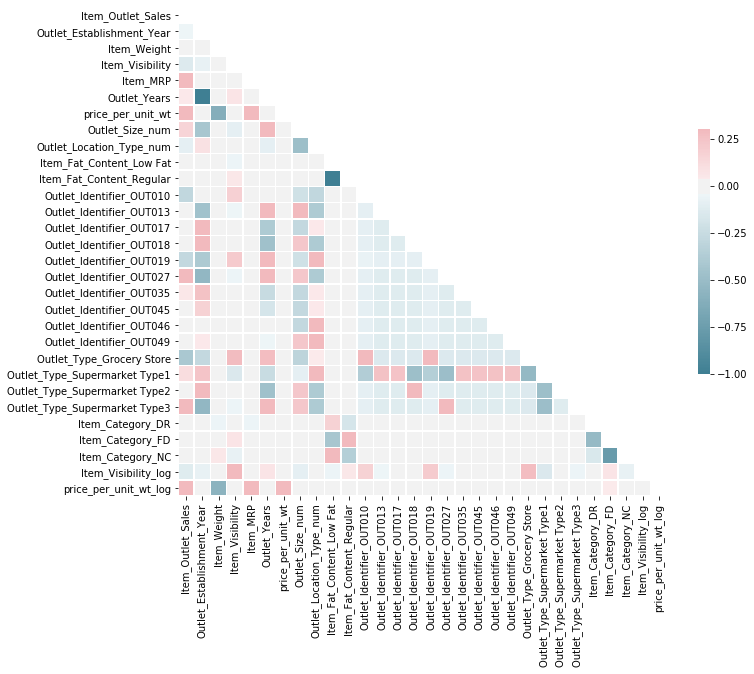

In [1109]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1110]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
train = train.loc[:, train.columns != 'Item_Identifier']
regressor = LinearRegression()  
regressor.fit(train, train.Item_Outlet_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)